
# **Importing the libraries**

In [1]:
#Data cleaning and analysis
import numpy as np
import pandas as pd

#Data visulization
import matplotlib.pyplot as plt
import seaborn as sns

# **Import the data**

In [2]:
#Data Loding
data = pd.read_csv("/content/drive/MyDrive/shapeai/Training Data.csv")
X_test = pd.read_csv("/content/drive/MyDrive/shapeai/Testing Data.csv")
df = data.drop(['Loan_ID'],axis=1)
Y_train = data['Loan_Status']

# **EDA(exploratory data analysis)**

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
#basic statistical information
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#check null values in columns
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# making two list : l for categorical data and m for continuos data
cat = list(df.select_dtypes("object").columns)
cat.append('Credit_History')
cat.append('Loan_Amount_Term')
l = set(cat)
con = set(df.columns)
con = list(con.difference(l))
cat.remove('Loan_Status')
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History',
 'Loan_Amount_Term']

In [11]:
# Changing the data type of categorical data from Object to Category
for i in data.columns:
  if i in cat:
    df = df.astype({i:'category'})
    X_test = X_test.astype({i:'category'})


**Exploration**

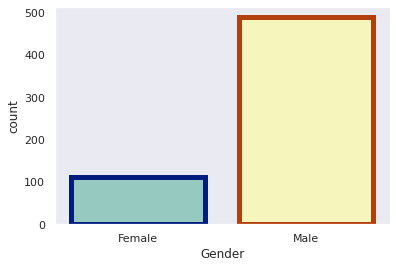

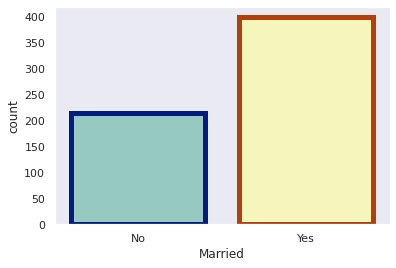

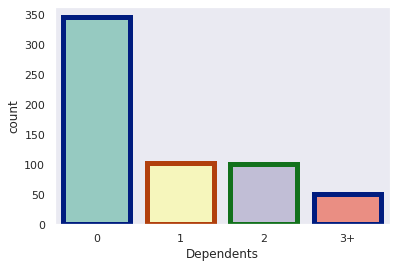

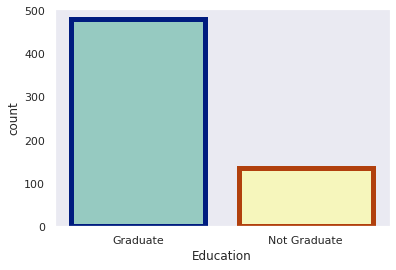

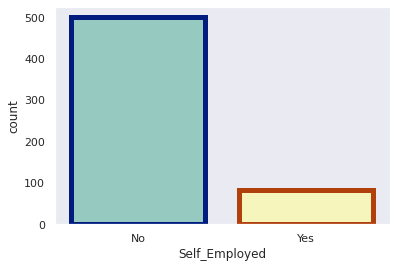

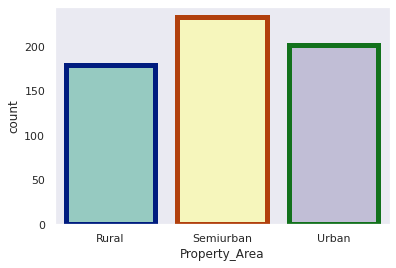

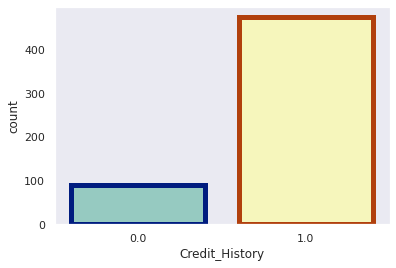

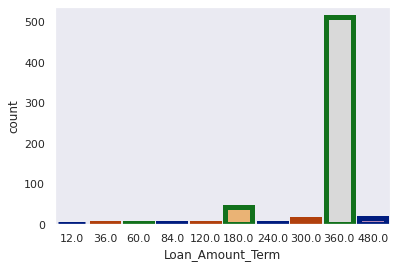

In [12]:
#Exploring Categorical Data 
sns.set_theme(style="dark")
for i in cat:
  sns.countplot(x=i, data=df, palette="Set3",linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
  plt.show()

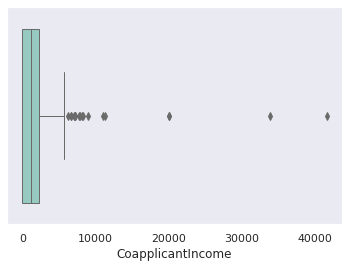

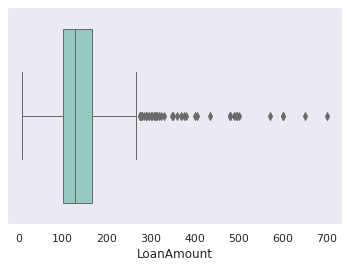

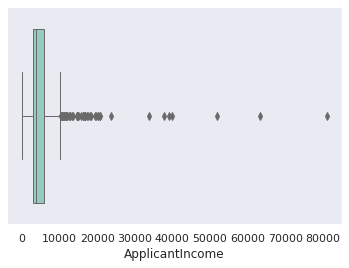

In [13]:
#Exploring Continues Data
for i in con:
  sns.boxplot(x=i,data=df,palette="Set3",linewidth=1)
  plt.show()

Number of married Males

In [14]:
male_to_female_ratio = (df[df.Gender == 'Male'].shape[0]/df[df.Gender == 'Female'].shape[0])
print("Male to Female ration is ",male_to_female_ratio)

Male to Female ration is  4.366071428571429


Number of unmarried Males

In [15]:
unmarried_males = df[(df.Gender=='Male') & (df.Married=='No')].shape[0]
print("Number of unmarried Males  is ",unmarried_males)

Number of unmarried Males  is  130


Number of married Females

In [16]:
married_Females = df[(df.Gender=='Female') & (df.Married=='Yes')].shape[0]
print("Number of married Females  is ",married_Females)

Number of married Females  is  31


Number of unmarried Females

In [17]:
unmarried_Females = df[(df.Gender=='Female') & (df.Married=='No')].shape[0]
print("Number of unmarried Females  is ",unmarried_Females)

Number of unmarried Females  is  80


Number of Males and Females are graduated and non-graduated with respect to their Marital status.

In [18]:
abc = df.groupby(by=['Gender','Education','Married'])['Gender'].count()
abc

Gender  Education     Married
Female  Graduate      No          66
                      Yes         25
        Not Graduate  No          14
                      Yes          6
Male    Graduate      No          99
                      Yes        275
        Not Graduate  No          31
                      Yes         82
Name: Gender, dtype: int64

encoding required to perform on the "Education" column

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
abc = np.array(df['Education']).reshape(-1,1)
abc.shape
le.fit_transform(abc)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

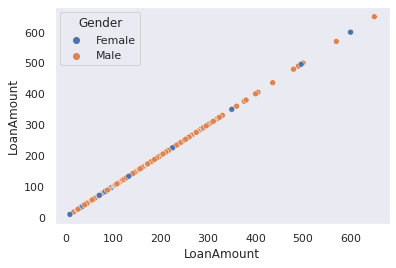

In [20]:
sns.scatterplot(x='LoanAmount',y='LoanAmount',hue='Gender',data=df)

we can see that Male's LoanAmount is highest and it's around 700

specification and information about the applicant who has the highest income.

In [21]:
df[df['ApplicantIncome']==df['ApplicantIncome'].max()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


# **Data Visulization**

Here we'll see how the target/dependent value changes with the feature.

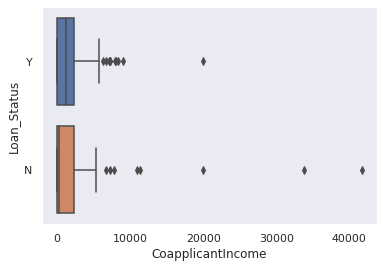

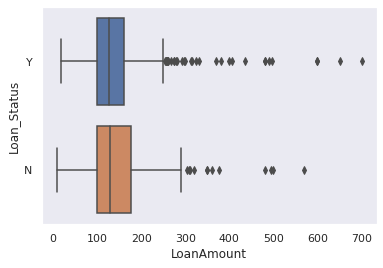

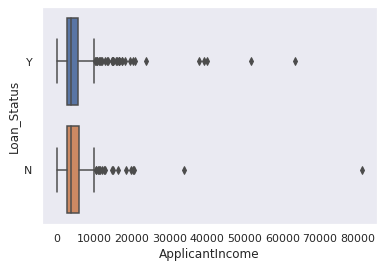

In [22]:
#exploring continuos value compare to 'Loan Status'
for i in con:
  sns.boxplot(y=Y_train,x=i,data=df)
  plt.show()

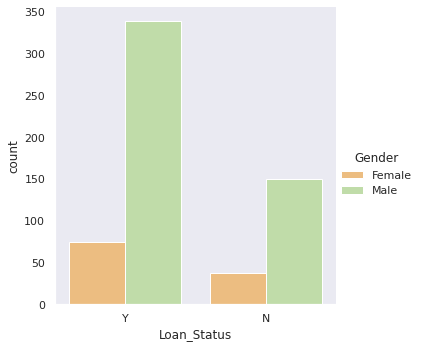

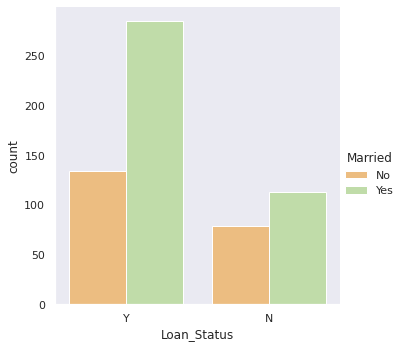

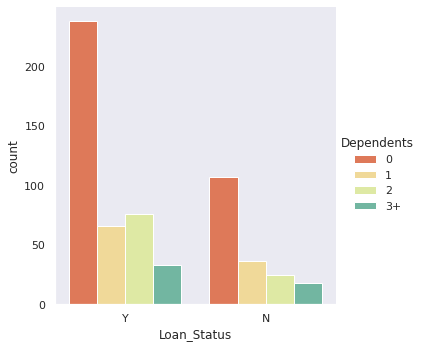

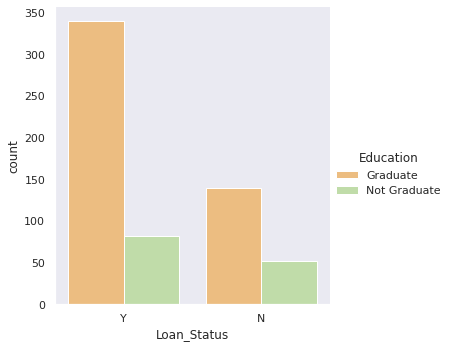

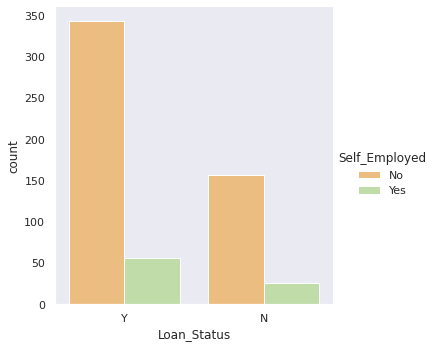

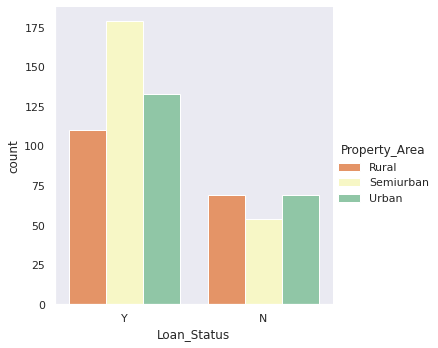

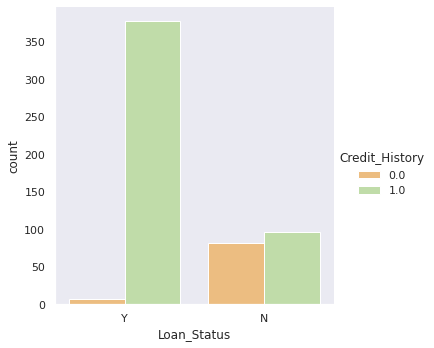

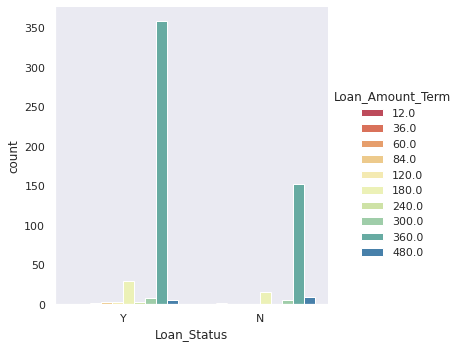

In [23]:
#exploring categorical value compare to 'Loan Status'
for i in cat:
  if i=='Loan_Status':
    continue
  else:
    sns.catplot(x='Loan_Status', hue=i, kind='count', palette="Spectral", data=df)
    plt.show()
    print('\n\n')

# **Feature Engineering**
1.Imputing: Handling Missing Data

In [24]:
# Filling The Missing Values
for i in cat:
  df[i]=df[i].fillna(df[i].mode()[0])
  X_test[i]=X_test[i].fillna(X_test[i].mode()[0])
for i in con:
  df[i]=df[i].fillna(df[i].mean())
  X_test[i]=X_test[i].fillna(X_test[i].mean()) 



2.Handling Of Outliers

In [25]:
# Using cap methode to handle outliers
for i in con:
  upper_lim = df[i].quantile(.90)
  lower_lim = df[i].quantile(.10)
  df.loc[(df[i] > upper_lim),i] = upper_lim
  df.loc[(df[i] < lower_lim),i] = lower_lim

In [26]:
df.shape

(614, 12)

In [27]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

3.Label Encoding

In [28]:
X_train = df.drop('Loan_Status',axis=1)

In [29]:
#encode data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[ X_train.select_dtypes( include=['category']).columns ] = X_train[ X_train.select_dtypes( include=['category']).columns ].apply(le.fit_transform)
X_test[ X_test.select_dtypes( include=['category']).columns ] = X_test[ X_test.select_dtypes( include=['category']).columns ].apply(le.fit_transform)

In [30]:
X_test.drop(['Loan_ID'],axis=1,inplace=True)

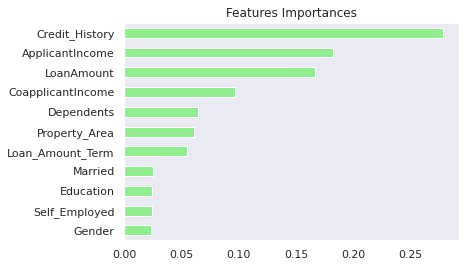

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
x = model.feature_importances_
importances = pd.Series(data=model.feature_importances_[:11],
                        index= df.columns[:11])

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
#plt.figure(figsize=(10,15))
plt.title('Features Importances')
plt.show()


we will only consider the first 7 features for our model fitting ,Because the last 4 features do not greatly affect our dependent variable.

In [32]:
df.drop(['Education','Married','Self_Employed','Gender'],axis=1,inplace=True)
X_test.drop(['Education','Married','Self_Employed','Gender'],axis=1,inplace=True)

4.Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=ss.fit_transform(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=ss.fit_transform(X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

# **Model Selection**

In [34]:
#Data split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.12,random_state=0)

 we know  that for small dataset hyperoparameter tuning is not working as expected,so we will continue with simple Logistic regression.

In [41]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [46]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,lr_pred)
print(f" Accuracy of  lr model is {acc}")

 Accuracy of  lr model is 0.8783783783783784


In [37]:
actual = list(y_test)
lr_pred = list(np.array(lr_pred))
lb = pd.DataFrame(columns=["pred","actual"])
lb.pred = lr_pred
lb.actual = actual


In [45]:
lb.head(10)

,pred,actual
0,Y,Y
1,Y,N
2,Y,Y
3,Y,N
4,Y,Y
5,N,N
6,Y,Y
7,Y,Y
8,N,N
9,Y,Y


**CONCLUSION:**

From the data, we can understand that there are several features that greatly affect getting a loan. like If person have zero dependent and have credit policy has higher chance of getting loan. In addition, if the person is semi-urban and married, there is a strong chance of getting a loan.

In [48]:
import pickle
pickle.dump(lr, open('/content/drive/MyDrive/shapeai/Model_1.pkl', 'wb'))